In [1]:
!pip install ultralytics albumentations boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.2 MB/s eta 0:00:00


In [3]:
import boto3
import botocore
from botocore.exceptions import ClientError
import os
from google.colab import userdata


os.environ['AWS_ACCESS_KEY_ID'] = userdata.get("AWS_ACCESS_KEY_ID")
os.environ['AWS_SECRET_ACCESS_KEY'] = userdata.get("AWS_SECRET_ACCESS_KEY")
os.environ['AWS_DEFAULT_REGION'] = 'us-east-1'

In [4]:
s3 = boto3.resource('s3')
BUCKET = "sjsu-fall24-data298-team6-bucket"
KEY = 'dataset/yolo.zip' # download whichever dataset format you need
try:
    s3.Bucket(BUCKET).download_file(KEY, 'data.zip')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == "404":
        print("The object does not exist.")
    else:
        raise

In [5]:
!unzip -q data.zip -d data

In [6]:
import torchvision

In [21]:
from torchvision.transforms import v2 as T
from PIL import Image

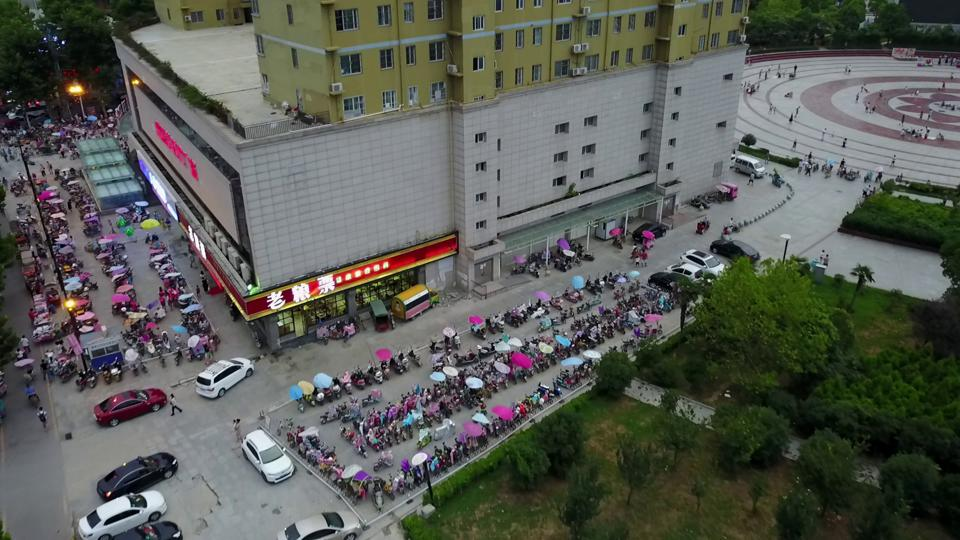

In [22]:
img = Image.open('/content/data/train/images/0000002_00448_d_0000015.jpg')
img

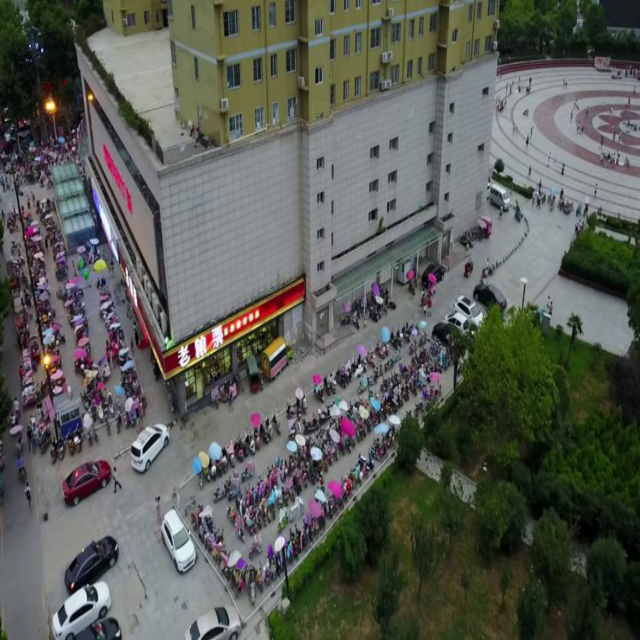

In [23]:
transform = T.Compose([
    #T.PILToTensor(),
    T.Resize((640, 640))
])
test = transform(img)
test

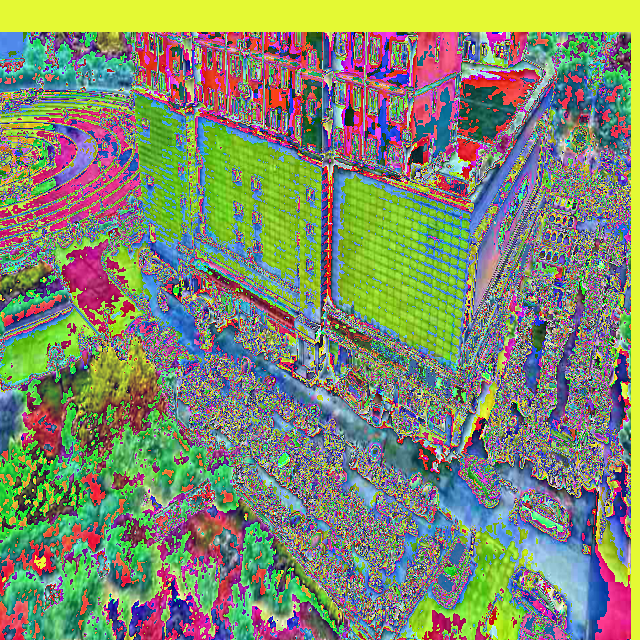

In [25]:
import torch
transform = T.Compose([
    T.PILToTensor(),
    T.ToDtype(torch.float32, scale=True),
    T.Resize((640, 640)),
    T.ColorJitter(brightness=0.4, saturation=0.7, hue = 0.015),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    T.ToPILImage()

])
test = transform(img)
test